<a href="https://colab.research.google.com/github/Stanley487/Data-Science/blob/main/Stanley_A_Rahman_(Data_Visualisation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      **Business and data visualization**

---




**Audience:** The audience for my choosen data is the stakeholders for Data4life company, including Health officers, healthcare proffesionals, Doctors and Researchers of the company. they are interested in understanding insights from the covid-19 dataset to inform their company and clients about the posssible drug, healt strategis, allocation of resources to their researchers and PHD worker and their decision making processes at the company regarding the health sector in Africa.


**Purpose:** The goal of my analysis is to give meagniful insights from the covid-19 dataset to help my clients understand the spread , impacts and harm the virus caused in africa and also identify the most vulnerable countries that suffered most during the covid season and to help infrom the genral public health measures that can be put in place in each of the countries to help prevent future occurence by visualising and exploring the data to give valuble information.

**Data:** my clients provided dataset of Africa's covid-19 cases, deaths,tests, recoveries and other relevant information. it was extracted from Kaggle (https://www.kaggle.com/code/jihenbelhoudi/omicron-in-africa-data-visualisation
).   



# **Methods**

---
 **Data Exploration:** A common data quality issue I found in my COVID-19 datasets was a small number of missing or null values. During my data investigation, I also discovered any essential data curation approaches.

**Data Cleaning:** there was no data cleaning neccessary as my data was already cleaned and i didn't need to clean anything.
**Data Visualisation:** i extracted the dataset and visualised 10 interesting insights from my covid-19 data. Each visualisation will be followed by a description of it's importance to public health and why the choosing insight.


In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
df=pd.read_csv('/content/Covid Africa - covid_africa (1).csv')
df.head()


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,Algeria,271852,6881,183061.0,81910.0,5995,152,230960.0,5093.0,45350148
1,Angola,105384,1934,103419.0,31.0,3009,55,1499795.0,42818.0,35027343
2,Benin,28014,163,27847.0,4.0,2191,13,604310.0,47268.0,12784726
3,Botswana,330256,2801,327049.0,406.0,135286,1147,2026898.0,830300.0,2441162
4,Burkina Faso,22056,396,21596.0,64.0,998,18,248995.0,11265.0,22102838


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            54 non-null     object 
 1   Total Cases        54 non-null     int64  
 2   Total Deaths       54 non-null     int64  
 3   Total Recovered    51 non-null     float64
 4   Active Cases       51 non-null     float64
 5   Tot Cases/ 1M pop  54 non-null     int64  
 6   Deaths/ 1M pop     54 non-null     int64  
 7   Total Tests        51 non-null     float64
 8   Tests/ 1M pop      51 non-null     float64
 9   Population         54 non-null     int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 4.3+ KB


In [4]:
df.isnull().sum()

Country              0
Total Cases          0
Total Deaths         0
Total Recovered      3
Active Cases         3
Tot Cases/ 1M pop    0
Deaths/ 1M pop       0
Total Tests          3
Tests/ 1M pop        3
Population           0
dtype: int64

In [5]:
df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,5.400000e+01,54.000000,5.100000e+01,51.000000,54.000000,54.000000,5.100000e+01,51.000000,5.400000e+01
mean,2.279089e+05,4772.592593,2.068947e+05,6351.470588,27020.407407,312.444444,2.142069e+06,167375.666667,2.601671e+07
std,5.888271e+05,14650.689931,5.678707e+05,17826.030092,73571.592189,527.218320,4.193141e+06,222039.352501,3.757453e+07
min,6.597000e+03,38.000000,4.874000e+03,0.000000,381.000000,3.000000,2.369300e+04,5093.000000,9.942600e+04
25%,2.288575e+04,291.250000,1.985550e+04,27.000000,2451.750000,33.250000,3.467785e+05,29172.500000,2.890966e+06
50%,6.385400e+04,1024.000000,6.247100e+04,309.000000,4760.000000,93.500000,8.049090e+05,60951.000000,1.373308e+07
75%,1.719558e+05,3066.500000,1.686770e+05,1752.500000,16997.250000,226.250000,2.255373e+06,227793.000000,3.159111e+07
max,4.076463e+06,102595.000000,3.912506e+06,81910.000000,512311.000000,2442.000000,2.679509e+07,885119.000000,2.167469e+08


In [6]:
df.columns

Index(['Country', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests',
       'Tests/ 1M pop', 'Population'],
      dtype='object')

# **Bar Chart**

**this insights gives the Top 5 countries with the most Covid Cases in Africa, this allows us to know the most vulnerable countries that are most likely to suffer if there's to be another global pandenmic and also the total number of cases these countries recorded.**

In [7]:
df1 = df.sort_values(by='Total Cases', ascending=False).reset_index().head(5)

fig = px.bar(df1, x='Country', y='Total Cases', color='Total Cases',
             color_continuous_scale='reds')

fig.update_layout(title='Top 5 countries with the most COVID-19 cases in Africa',
                  title_x=0.5,
                  title_font=dict(size=16, color='Red'),
                  xaxis=dict(showgrid=False),  # Remove grid lines from x-axis
                  yaxis=dict(showgrid=False),  # Remove grid lines from y-axis
                  plot_bgcolor='rgba(0,0,0,0)')


fig.show()



# **Choropleth**

**This gives is an insights of all the cases that happened in Africa during the covid-19 pandemic, it shows each african country on the map and their total number of covid cases recorded.**

In [8]:
df1 = df.sort_values(by=['Total Cases'],ascending = False).reset_index()

fig = px.choropleth(df1,
                    locations = 'Country',
                    locationmode = 'country names',
                    color = 'Total Cases',
                    scope = 'africa',
                    hover_name = 'Country',
                    color_continuous_scale = 'reds')

fig.update_layout(title= 'COVID-19 Cases in Africa Countries',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'Darkred'),
                  geo = dict(showframe = False,
                             showcoastlines = False,
                             projection_type = 'equirectangular'))
fig.show()



# **Bar Chart**

**this insights gives the Top 10 countries with the most Covid Deaths in Africa, this allows us to know the most vulnerable countries that are most likely to suffer if there's to be another global pandenmic and also the total number of Deaths these countries recorded.**

In [9]:
df1 = df.sort_values(by = ['Total Deaths'],ascending = False).reset_index().head(10)

fig = px.bar(df1, x= 'Country',
             y ='Total Deaths',
             color = 'Total Deaths',
             color_continuous_scale = 'greys')

fig.update_layout(title = 'Top 10 countries with the most COVID-19 Deaths in Africa',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'Black'),
                  xaxis=dict(showgrid=False),  # Remove grid lines from x-axis
                  yaxis=dict(showgrid=False),  # Remove grid lines from y-axis
                  plot_bgcolor='rgba(0,0,0,0)')

fig.show()

**Bar Chart**

The bar plot visualizes the mortality rate (deaths per case) for each country in Africa, providing insights into the severity of COVID-19 outbreaks in different regions. The color of each bar represents the mortality rate, with darker shades indicating higher mortality rates. This visualization allows stakeholders to identify countries with particularly high or low mortality rates and can inform targeted interventions and public health policies to reduce the impact of the pandemic.








In [10]:

# Calculate Mortality Rate
df['Mortality Rate'] = df['Total Deaths'] / df['Total Cases']

# Create the bar plot using Plotly Express with a continuous color scale
fig7 = px.bar(df, x='Country', y='Mortality Rate', title='Mortality Rate (Deaths per Case) in Africa',
              color='Mortality Rate', color_continuous_scale='greys')

# Update layout to enhance visualization
fig7.update_layout(
    title=dict(text='Mortality Rate (Deaths per Case) in Africa', x=0.5, font=dict(size=24, color='black')),
    xaxis=dict(title='Country', titlefont=dict(size=14, color='black')),
    yaxis=dict(title='Mortality Rate', titlefont=dict(size=14, color='black')),
    plot_bgcolor='rgba(255, 255, 255, 0)',  # Set plot background color to fully transparent
    paper_bgcolor='rgba(255, 255, 255, 0)',  # Set plot paper color to fully transparent
    font=dict(family='Arial', size=12, color='black'),  # Set text font and size
    showlegend=False,  # Hide legend
    hovermode='closest',  # Show hover labels closest to the cursor
)

# Remove grid lines
fig7.update_xaxes(showgrid=False)
fig7.update_yaxes(showgrid=False)

# Show the plot
fig7.show()



**Heatmap**

The intensity and direction of the associations between the various COVID-19 parameters in Africa are visually shown by the correlation heatmap.
Strong positive correlations are shown by correlation coefficients near 1, and strong negative correlations are indicated by correlation coefficients around -1. There is minimal to no association when the coefficient is near to 0.
An understanding of the variables impacting the virus's seriousness and transmission can be gained from the correlations between data such as total cases, total deaths, total recovered, and testing rates.

In [39]:
import numpy as np

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate correlations using only numeric columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap to show correlations between different COVID-19 metrics
# Create a heatmap to show correlations between different COVID-19 metrics
heatmap_fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='redor',  # Example of a valid colorscale
    colorbar=dict(title='Correlation', tickvals=[-1, -0.5, 0, 0.5, 1]),  # Add color bar
))


# Update layout
heatmap_fig.update_layout(
    title=dict(text='Correlation Heatmap of COVID-19 Metrics in Africa', x=0.5, font=dict(size=24, color='Black')),
    xaxis=dict(title='COVID-19 Metrics', titlefont=dict(size=14, color='Black')),
    yaxis=dict(title='COVID-19 Metrics', titlefont=dict(size=14, color='Black')),
    font=dict(family='Arial', size=12, color='Black'),  # Set text font and size
    plot_bgcolor='rgba(255, 255, 255, 0)',  # Set plot background color to fully transparent
    paper_bgcolor='rgba(255, 255, 255, 0)',  # Set plot paper color to fully transparent
)

# Show the heatmap
heatmap_fig.show()


**Scatter plots**

The following scatter plots provide information on COVID-19 testing in Africa. Plotting the capacity for testing against the number of verified cases reveals differences in testing efforts and disease burden between countries. The second plot illustrates differences in testing rates by population size, pointing to testing infrastructure and accessibility difficulties.
My clients(Data4life) may better grasp the testing environment in Africa and find ways to enhance testing strategies to manage resources wisely, and stop the spread of COVID-19 throughout the continent by examining these scatter plots.

In [12]:

# Creating a scatter plot for Total Tests vs Total Cases
fig_scatter = px.scatter(df, x='Total Tests', y='Total Cases', color='Country',
                         title='COVID-19 Total Tests vs Total Cases in Africa')

# scatter plot for Tests per 1M pop vs Total Tests
fig_scatter_tests = px.scatter(df, x='Tests/ 1M pop', y='Total Tests', color='Country',
                               title='COVID-19 Tests per 1m Population vs Total Tests in Africa')

# Creating subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Tests vs Total Cases', 'Tests per 1M Population vs Total Tests'))

# Adding scatter plot for Total Tests vs Total Cases to subplot
for trace in fig_scatter.data:
    fig.add_trace(trace, row=1, col=1)

# Adding scatter plot for Tests per 1M pop vs Total Tests to subplot
for trace in fig_scatter_tests.data:
    fig.add_trace(trace, row=1, col=2)

# Updating marker styles
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Updating layout
fig.update_layout(title=dict(text='Comparison of COVID-19 Testing in Africa', x=0.5,
                             font=dict(size=24, color='Black', family='Arial')),
                  xaxis=dict(title='Total Tests / Tests per 1M pop',
                             titlefont=dict(size=14, color='Black', family='Arial')),
                  yaxis=dict(title='Total Cases / Total Tests',
                             titlefont=dict(size=14, color='Black', family='Arial')),
                  xaxis2=dict(title='Tests per 1M pop',
                              titlefont=dict(size=14, color='Black', family='Arial')),
                  yaxis2=dict(title='Total Tests',
                              titlefont=dict(size=14, color='Black', family='Arial')),
                  showlegend=False,
                  plot_bgcolor='rgba(255, 255, 255, 0)',  # Set plot background color to fully transparent
                  paper_bgcolor='rgba(255, 255, 255, 0)',  # Set plot paper color to fully transparent
                  font=dict(family='Arial', size=12, color='Black'))  # Set text font and size

# Showing the plot
fig.show()


In [13]:


# Creating a box plot to show the distribution of Total Cases across continents
box_plot = px.box(df, x='Country', y='Total Cases', color='Country',
                  title='Distribution of Total Cases Across the Continent',
                  labels={'Total Cases': 'Total Cases'})

# Update layout
box_plot.update_layout(
    title=dict(text='Distribution of Total Cases Across Countries', x=0.5, font=dict(size=24, color='Black')),
    xaxis=dict(title='Countries', titlefont=dict(size=14, color='Black')),
    yaxis=dict(title='Total Cases', titlefont=dict(size=14, color='Black')),
    font=dict(family='Arial', size=12, color='Black'),  # Set text font and size
    showlegend=False,  # Hide legend
    plot_bgcolor='rgba(255, 255, 255, 0)',  # Set plot background color to fully transparent
    paper_bgcolor='rgba(255, 255, 255, 0)',  # Set plot paper color to fully transparent
)

# Showing the box plot
box_plot.show()


**Pair Plots**

The pair plot provides a comprehensive view of the relationships between COVID-19 metrics, including total cases, total deaths, total recovered, and total tests. Each pair of metrics is plotted against each other, allowing for easy comparison and identification of potential correlations or trends. This visualization can help anyone looking at the visualisation  gain insights into the interplay between different COVID-19 metrics and inform decision-making processes related to pandemic response and management.

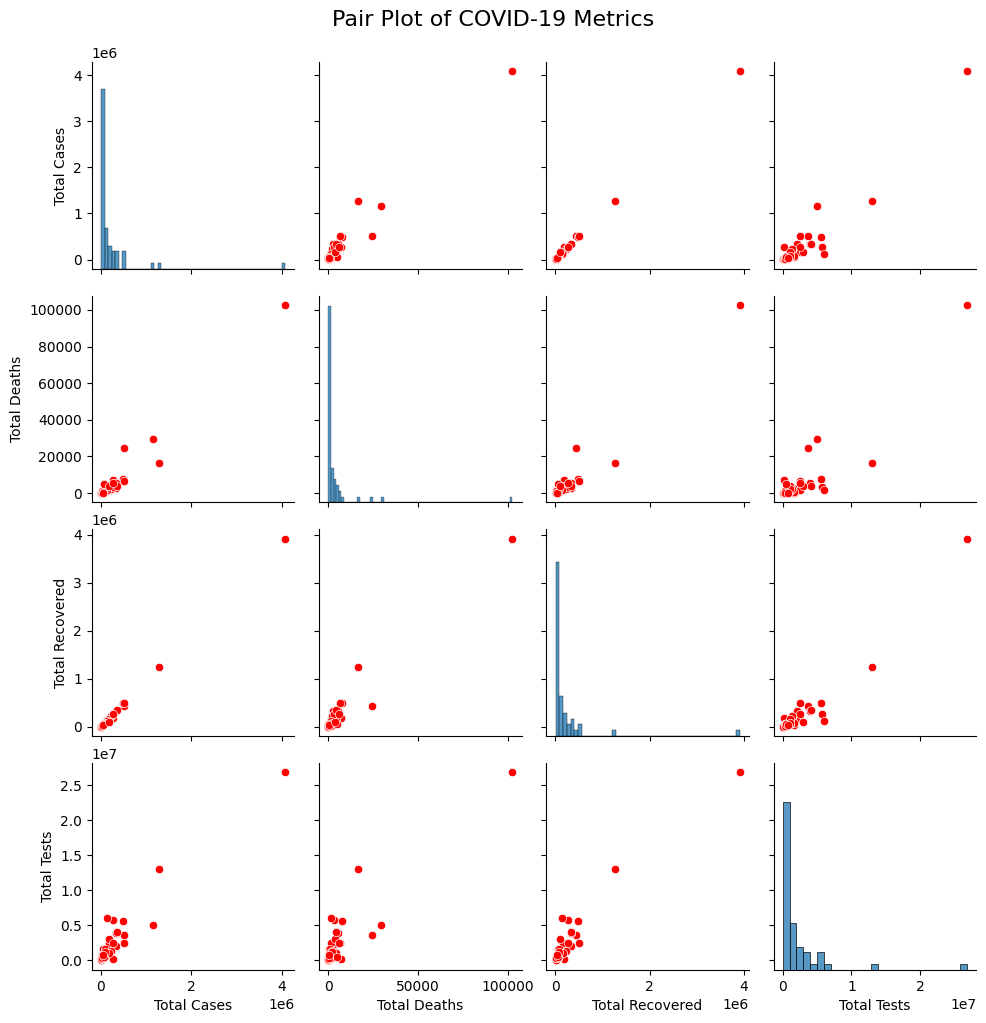

In [14]:


# Selecting relevant columns for the pair plot
pair_df = df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Total Tests']]

# Creating a pair plot to visualize pairwise relationships
pair_plot = sns.pairplot(pair_df, plot_kws={'color': 'red'})

#  title
plt.suptitle('Pair Plot of COVID-19 Metrics', y=1.02, fontsize=16)

# Showing the pair plot
plt.show()


**Pie chart**

the code below shows the representationsmof the total numver of recovered cases in Africa compared to the number of active cases. the chart gives a clear and understanding insight of the percentages of the two categories in our dataset.

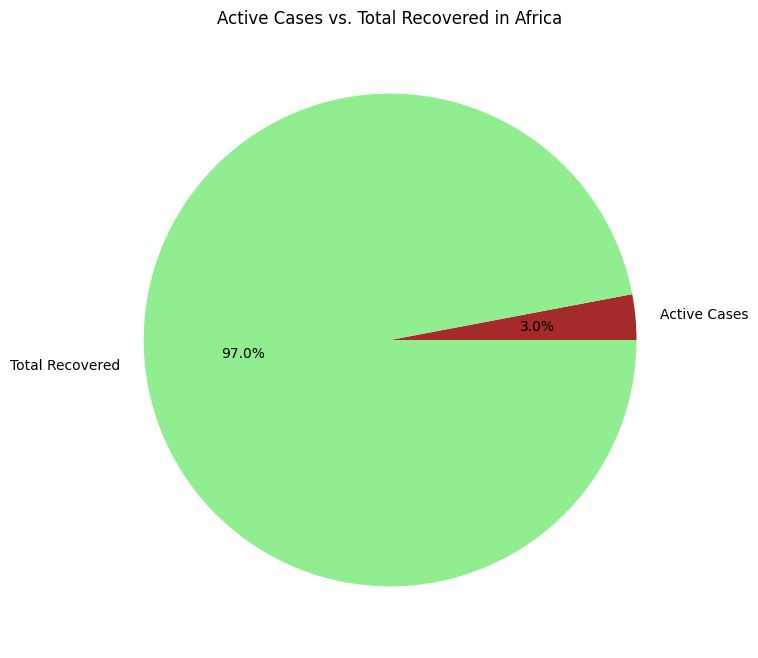

In [22]:

#  Pie Chart of Active Cases vs. Total Recovered
plt.figure(figsize=(8, 8))
df[['Active Cases', 'Total Recovered']].sum().plot(kind='pie', autopct='%1.1f%%', colors=['brown', 'lightgreen'])
plt.title('Active Cases vs. Total Recovered in Africa')
plt.ylabel('')
plt.show()



In [16]:
total_cases = df['Total Cases'].sum()
total_deaths = df['Total Deaths'].sum()
total_recovered = df['Total Recovered'].sum()
active_cases = df['Active Cases'].sum()

print("Total Cases:", total_cases)
print("Total Deaths:", total_deaths)
print("Total Recovered:", total_recovered)
print("Active Cases:", active_cases)


Total Cases: 12307083
Total Deaths: 257720
Total Recovered: 10551632.0
Active Cases: 323925.0


pair plot

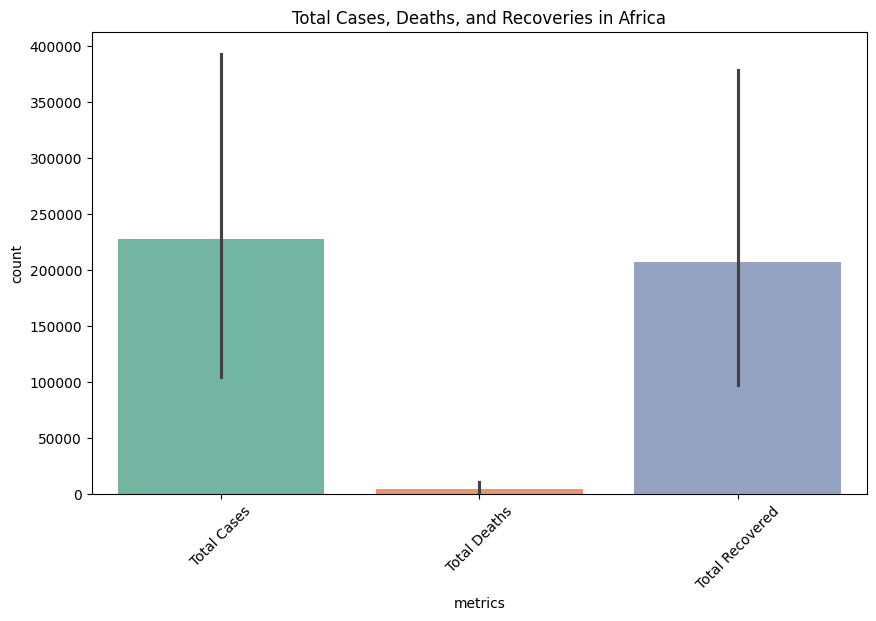

In [17]:
#  Bar Plot of Total Cases, Total Deaths, and Total Recovered
plt.figure(figsize=(10, 6))
sns.barplot(data=df[['Total Cases', 'Total Deaths', 'Total Recovered']], palette='Set2')
plt.title('Total Cases, Deaths, and Recoveries in Africa')
plt.ylabel('count')
plt.xlabel("metrics")
plt.xticks(rotation=45)
plt.show()

# **Limitations**


*   The quality of and accuracy of my data may not be realistic as i did not collect the data myself but obtained it online
*   My dataset lacked dates and time making it difficult to draw insights and trends over period of time.
*   Data might be bias due to external factors such as infracstructures and resources during Covid wasn't accounted for during my analysis.









# **Conclusion**
In this project, i worked on covid-19 exploratory data analysis in Africa to draw insights on the ipact of the global pandemic across the african countries. careful analysis and visualisations on various data metrics including mortality rates, actives cases, recovered cases etc, were taking into consideration to provide significant infromation for my clients.

my analysis shows the high mortality rates countries faced during the pandemic and also the countries with the lowest cases, these insights only highlights the need to provide the right resources and inyterventions to migitate the spread of future viruses.

taking into consideration, Machine learning and Data-Driven insights can be developed to help combat any future pandemic likely to happen and also draw strategies for developing african countries to battle public health crisis and also monitoring the the above metrics will help adapt strategies to overcome covid.

In [42]:
! jupyter nbconvert --to html Stanley_A_Rahman_\(Data_Visualisation\)\ \(1\).ipynb

[NbConvertApp] Converting notebook Stanley_A_Rahman_(Data_Visualisation) (1).ipynb to html
[NbConvertApp] Writing 963508 bytes to Stanley_A_Rahman_(Data_Visualisation) (1).html
